[View in Colaboratory](https://colab.research.google.com/github/tchappui/heia-course-chemical-process-intensification/blob/master/Part1/S04_Exercise5.ipynb)

# S04 Exercise 5

## Importation of the needed libraries

In [0]:
# vectors and linear algebra
import numpy as np

# visualization tools
import matplotlib.pyplot as plt

# solvers to integrate ordinary differential equations
import scipy.integrate as solvers

from math import exp

## Definition of the constants

In [0]:
R = 8.314
Ea = 65700 # J/mol
T0 = 310 # K
Tj = 310 # K
CA0 = 9.3 # kmol/m3
FA0 = 16.3 * 0.9 # kmol/h
FAI = 16.3 * 0.1 # kmol/mh
Delta_HR = -6900 # J/(mole de butane)
cp_A = 141 # J/mol*K
cp_I = 161 # J/mol*K
Ua = 5000 # kJ/m3*h*K
k1 = 31.1 # h-1
Kc2 = 3.03 # -
T1 = 360 # K
T2 = 333 # K
cp_0 = cp_A + 0.1/0.9 * cp_I # J/mol*K

## Definition of the balance equations

In [0]:
def balances(variables, V, k1, Kc2, T1, T2, Ea, CA0, FA0, Delta_HR, Ua, Tj, cp_0):
    X, T = variables

    k = k1 * exp(Ea/R * (1/T1 - 1/T))
    Kc = Kc2 * exp(Delta_HR/R * (1/T2 - 1/T))
    
    r1 = k * CA0 * (1 - X)
    r2 = (k/Kc) * CA0 * X
    
    RA = -r1 + r2

    dX = -RA / FA0
    dT = ((-Delta_HR) * (r1-r2) +  Ua * (Tj - T)) / FA0 / cp_0

    return dX, dT

## Initial conditions and integration range

In [0]:
initial_conditions = [0, T0]

In [0]:
V = np.arange(0, 6, 0.001)

In [0]:
results = solvers.odeint(
    balances, 
    initial_conditions, 
    V, 
    (k1, Kc2, T1, T2, Ea, CA0, FA0, Delta_HR, Ua, Tj, cp_0)
)

In [0]:
X = results[:,0]
T = results[:,1]

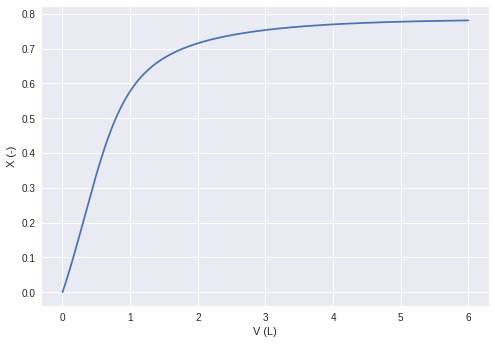

In [8]:
plt.plot(V, X)
plt.xlabel('V (L)')
plt.ylabel('X (-)')
plt.show()

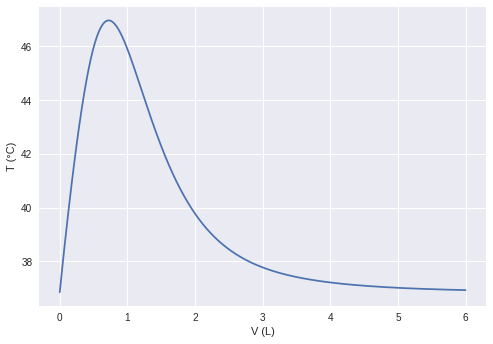

In [9]:
plt.plot(V, T - 273.15)
plt.xlabel('V (L)')
plt.ylabel('T (°C)')
plt.show()